# Artificially Generated Absorption Curves for Teaching Purposes in Astronomy 

In this Jupyter notebook, Planck's blackbody function will be used to generate blackbody absorption curves for stars of each spectral type.  Artificial absorption lines unique to each spectral type will be placed in the curves.  The last section will show how to doppler shift the curves given a velocity for the star.

## 1. Generating Blackbody Curves 

We are going to use Planck's function to generate the curves for a particular spectral type.  Let's bring in some libraries and define constants

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

c = 299792458  # speed of light
h = 6.62606876*10**(-34) # plancks constant
k = 1.380649*10**(-23) # boltzmann 
b = 2.897771955*10**(-3) # weins displacement law constant
pi = np.pi   # pie
nm = 10**(-9)  # create a constant to make wavelength values more manageable
Tsun = 5750   # suns surface temp

Now we define the Planck function, which is...



$$\frac{2hc^{2}}{\lambda^{5}}\frac{1}{e^{\frac{hc}{kt\lambda}}-1}$$



In [2]:
def planck_func(lamb, T):
    
    return ((2*h*c*c)/lamb**5)/(math.e**((h*c)/(lamb*k*T))-1)

We are sticking with wavelength instead of frequency since it is easier to relate wavelength to waveband of electromagnetic radiation, particurally visible light.

We will now create a linearspace of wavelengths from the near UV to the infrared.  So the last number in the np.linspace function is the number of data points you want to make.

In [3]:

blackbody_curves = pd.DataFrame()

blackbody_curves['Wavelength'] = np.linspace(0.5*10**(-7), 12.5*10**(-7), 5000)


Here is a list of tuples that will relate surface temperature $T_{eff}$ to spectral classification and a scaling factor (hard coded for now) that will allow students to see the relative magnitudes between each type of blackbody curve without the curves stretching the graph

In [4]:
# (spectral type, average t_eff, scale factor)

STARS = [('O Star', 21000, 800),('B Star', 15000, 210),('A Star', 9400, 30),
         ('F Star', 7100, 9),('G Star', 5700, 4),('K Star', 4900, 3),('M Star', 3900, 1.5)]

Now we will build our dataframe with absorption curves for each spectral type.

In [5]:
def dataframe_build(df, config):

    for x, star in enumerate(config):
    
        df[star[0]] = df['Wavelength'].apply(lambda lamb: planck_func(lamb, star[1]))
        df[star[0]] = df[star[0]]/star[2]
        
    # we can normalize everything using the maximum intensity in all the data.  
    # we take the max of the maximums in the column
    
    max_I = df.max().max()

    df.loc[:, df.columns != 'Wavelength'] = df.loc[:, df.columns != 'Wavelength']/max_I
        
    return df

blackbody_curves = dataframe_build(blackbody_curves, STARS)

blackbody_curves.head(10)

,Wavelength,O Star,B Star,A Star,F Star,G Star,K Star,M Star
0,5.000000e-08,0.025508,0.000405,3.082375e-08,5.070116e-12,5.420365e-16,1.902968e-19,1.098816e-25
1,5.024005e-08,0.026590,0.000433,3.483436e-08,6.007834e-12,6.735733e-16,2.459749e-19,1.526266e-25
2,5.048010e-08,0.027703,0.000463,3.931657e-08,7.106696e-12,8.352075e-16,3.171325e-19,2.113144e-25
3,5.072014e-08,0.028848,0.000495,4.431971e-08,8.392245e-12,1.033406e-15,4.078471e-19,2.916363e-25
4,5.096019e-08,0.030026,0.000528,4.989761e-08,9.893725e-12,1.275933e-15,5.232102e-19,4.012246e-25
5,5.120024e-08,0.031237,0.000564,5.610892e-08,1.164457e-11,1.572093e-15,6.695651e-19,5.502834e-25
6,5.144029e-08,0.032481,0.000601,6.301747e-08,1.368292e-11,1.933014e-15,8.547952e-19,7.524148e-25
7,5.168034e-08,0.033759,0.000640,7.069268e-08,1.605227e-11,2.371979e-15,1.088677e-18,1.025697e-24
8,5.192038e-08,0.035071,0.000682,7.920996e-08,1.880209e-11,2.904815e-15,1.383305e-18,1.394087e-24
9,5.216043e-08,0.036417,0.000725,8.865112e-08,2.198860e-11,3.550338e-15,1.753611e-18,1.889242e-24


Next we construct our graphs.  We label the axis in a way for the students to understand the relationship between temperature and wavelength given Wein's Law

$$ \lambda_{peak} = \frac{b}{T_{peak}} $$

where b is Wein's displacement constant.  We can write this function in to transform our wavelengths into effective temperatures.  We can also mark the peaks with vertical lines, allowing us to label the black body curves with their peak wavelengths.

Below are two functions: Wein's displacement law, and our plotting function.

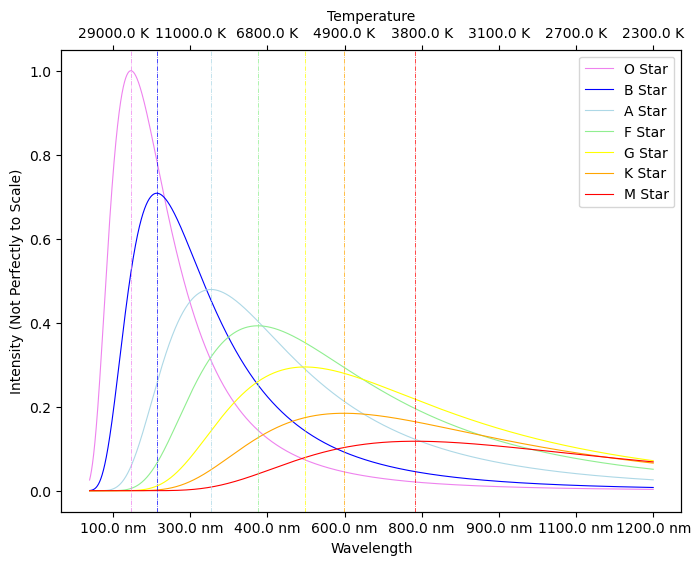

In [24]:

def wein_T(wavelength):
    
    temp = b/wavelength
    
  #  return ["%0.fK" % z for z in temp]
    return [str(round(z,-2))+' K' for z in temp]


def plot_curves(df, color_list, config):
    
    ax1 = df.plot(x='Wavelength', figsize=(8, 6), color=color_list, lw=0.8)
    ax2 = ax1.twiny()
    
    ax1.set_ylabel('Intensity (Not Perfectly to Scale)')
    ax1.set_xlabel('Wavelength')
    
    x_ticks = np.linspace(10**(-7), 12.5*10**(-7), 8)
    
    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels(str(round(i*10**9, -2))+' nm' for i in x_ticks)
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(x_ticks)
    ax2.set_xticklabels(wein_T(x_ticks))
    ax2.set_xlabel("Temperature")
    
    peak_temps = []
    for con in config: peak_temps.append(con[1])
    
    for color_, temp in zip(color_list, peak_temps):
                
        ax1.axvline(x = b/temp, color = color_, linestyle = '-.', lw=0.5) #, label = "λ = "+str(b/temp)+" nm")
        
    plt.show()
    
# spectral colors
COLORS = ['violet','blue','lightblue','lightgreen','yellow','orange','red']    
    
plot_curves(blackbody_curves, COLORS, STARS)

You are welcome to modify the scale anyway you would like but these blackbody curves are scaled such that they can all be visually seen on the same graph. 

## 2. Adding Absorption Lines 

We can add artificial absoprtion lines in our graphs by creating a new list of the absorption wavelengths.  Then when we run through the blackbody curves we can create reductions in the intensity to create the absoprtion effect.  The function below will locate where the absorption wavelengths are and will create a spike with a particular width.

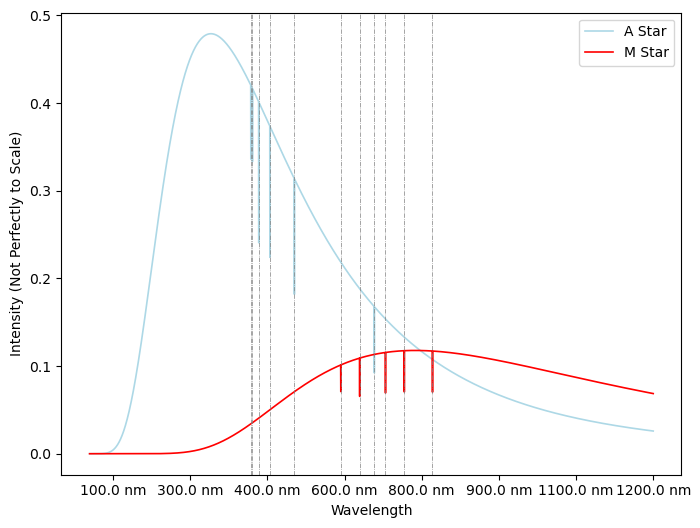

In [47]:

# function to add lines
def add_absorption_lines(df, star, w_list):
    
    # new array of intensities
    new_I = []
    
    # list of wavelengths to search through
    wavelength_a = []
    # list of weights
    weights = []
    
    # we are going to match the indicies of the peak wavelengths with their weights so you can scale each 
    # absorption line
    
    for w in w_list:
        
        wavelength_a.append(w[1])
        weights.append(w[2])
    
    for wave, I in zip(df['Wavelength'], df[star]):
        
        if any(wave < (s+0.25)*nm and wave > (s-0.25)*nm for s in wavelength_a):
   
            for wl in wavelength_a:
                if wave < (wl+0.25)*nm and wave > (wl-0.25)*nm:        # We can make the lines wider for even
                    i = wavelength_a.index(wl)                         # fun stuff
            
            new_I.append(I*weights[i])
            
        else: 
            new_I.append(I)
    
    absorption_data = pd.DataFrame()
    absorption_data['Wavelength'] = df['Wavelength']
    absorption_data[star] = new_I
    
    return absorption_data[star]


def plot_abs(df, color_list, config):
    
    ax1 = df.plot(x='Wavelength', figsize=(8, 6), color=color_list, lw=1.2)
    
    ax1.set_ylabel('Intensity (Not Perfectly to Scale)')
    ax1.set_xlabel('Wavelength')
    
    x_ticks = np.linspace(10**(-7), 12.5*10**(-7), 8)
    
    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels(str(round(i*10**9, -2))+' nm' for i in x_ticks)
    
    linelabels = []  # the type of line
    abslines = []   # the value of the absorption line
    
    for con in config:
        for c in con:
            linelabels.append(c[0])
            abslines.append(c[1]*nm)
            
            
    for ll, al in zip(linelabels, abslines):
                
        ax1.axvline(x = al, color = 'gray', linestyle = '-.', lw=0.5) #, label = "λ = "+str(ll)+" nm")
        
    
    plt.show()


# TODO: make absorption lines into a dictionary
# ('Emission Line name', wavelength, scale)

B_LINES = [('Hα', 656.3, 0.55), ('Hβ', 486.1, 0.58), ('Hγ', 434.0, 0.6), ('Hδ', 410.2, 0.6),
          ('He 1',389.0 , 0.6), ('He 2',447.1 , 0.6), ('He 3',501.5 , 0.6), ('He 4', 588.2, 0.6)]

A_LINES = [('Hα', 656.3, 0.55), ('Hβ', 486.1, 0.58), ('Hγ', 434.0, 0.6), ('Hδ', 410.2, 0.6), 
           ('Ca II a', 396.8 ,0.8), ('Ca II b', 393.3, 0.8)]

G_LINES = [('CH Band', 430.0, 0.6), ('Hβ', 486.1, 0.58), ('Hα', 656.3, 0.55), ('Na D1', 589.0, 0.6),
          ('Na D2', 589.6, 0.6), ('Ca II a', 396.8 ,0.8), ('Ca II b', 393.3, 0.8)]

M_LINES = [('Na', 585.0, 0.7), ('TiO', 680, 0.6), ('TiO', 625, 0.6), ('TiO', 720, 0.6), ('TiO', 780, 0.6)]

   
absorption_curves = pd.DataFrame()
absorption_curves['Wavelength'] = blackbody_curves['Wavelength']

absorption_curves['A Star'] = add_absorption_lines(blackbody_curves, 'A Star', A_LINES)
absorption_curves['M Star'] = add_absorption_lines(blackbody_curves, 'M Star', M_LINES)


# send in all emission line locations
plot_abs(absorption_curves, ['lightblue', 'red'], [A_LINES, M_LINES])

# TO DO, label absorption lines

## 3. Doppler Shifting With Absorption Lines 

We can shift these artificial absorption spectra with the doppler shift formula.  For astronomical purposes we use this simplification:

$$ 1-\frac{\lambda_{obs}}{\lambda_{source}} = \frac{v_{star}}{c} $$

Where $\lambda_{obs}$ is observed by Earth from the moving star and $\lambda_{emit}$ is the unshifted true wavelength.  Here we are going to produce shifted absorption spectra given the line we want to use to pivot the change.  We will use this equation to find $\Delta\lambda$ which will be how much we need to shift the graph by, given a velocity $v_{star}$.

In [51]:
# doppler equation

def doppler(lambda_obs, vel):
    
    lambda_source = lambda_obs/(1-vel/c)
    
    return lambda_source-lambda_obs


# shift curve, returns a series

def shift_abscurve(df, v, line):
    
    del_lamb = doppler(line, v)
    
    return df['Wavelength']+del_lamb

# prepare data for shifting

A_STAR_ABS = pd.DataFrame()
A_STAR_ABS['Wavelength'] = blackbody_curves['Wavelength']
A_STAR_ABS['A Star'] = add_absorption_lines(blackbody_curves, 'A Star', A_LINES)


# velocities need to be in m/s, 15000000 is only used to show a substantial shift on a plot

A_STAR_ABS['Blue Shift'] = shift_abscurve(A_STAR_ABS, -15000000, 656.3*nm)

A_STAR_ABS['Red Shift'] = shift_abscurve(A_STAR_ABS, 15000000, 656.3*nm)


Now let's take a look at a graph of all three curves.

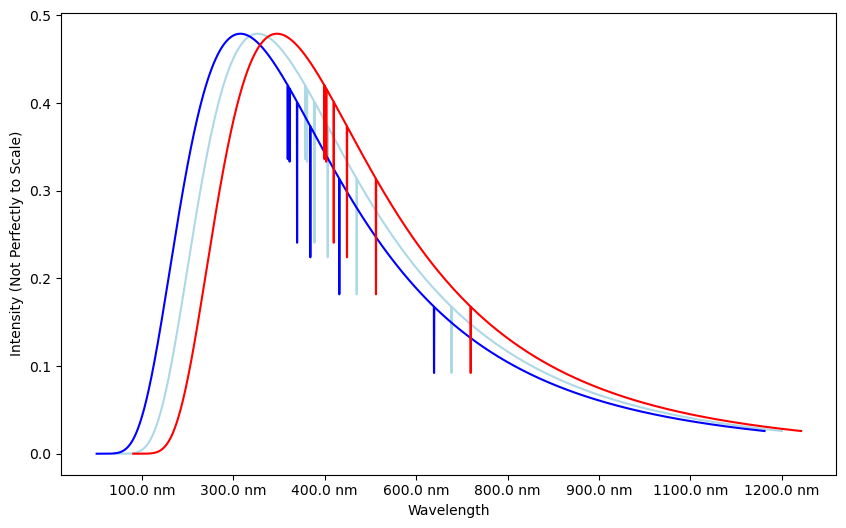

In [52]:
def doppler_curve_plot(df):
    
    fig = plt.figure(figsize=(10,6))
#    ax=fig.add_subplot(111, label="A Star")
#    ax2=fig.add_subplot(111, label="Blue Shifted", frame_on=False)
#    ax3=fig.add_subplot(111, label="Red Shifted", frame_on=False)
    
    plt.plot(df['Wavelength'], df['A Star'], color = 'lightblue')
    plt.plot(df['Blue Shift'], df['A Star'], color = 'blue')
    plt.plot(df['Red Shift'], df['A Star'], color = 'red')
    
    plt.xlabel('Wavelength')
    plt.ylabel('Intensity (Not Perfectly to Scale)')
    
    x_ticks = np.linspace(10**(-7), 12.5*10**(-7), 8)
    
    plt.xticks(ticks=x_ticks, labels=[str(round(i*10**9, -2))+' nm' for i in x_ticks])
    
    plt.show()
    
doppler_curve_plot(A_STAR_ABS)
    

Remember that the velocity we chose was only chosen to show an effect on a graph, normally v shouldn't be.... relativistic.

With shifted absorption curves, a introductory astronomy class for majors could practice analyzing multiple curves to generate radial velocities for two stars in a binary.  To do this:

1. Begin with a mass ratio between two stars, then use that to generate two maximum velocities

2. Use those velocities to anchor a sinusioudal equation for each star, which can generate radial velocities.

3. The radial velocities can be used to generate absoprtion spectra for each observation

An upper division course can feature more parameters, such as eccentricity, average orbital separation, or inclination.  This would be an excellent lab for a group of science majors that want to practice their coding and data analytical skills.

Let's first generate velocities for a hypothetical binary system of mass ratio 1.8

In [54]:
# returns a dataframe with 50 rows of velocities for each star.  time will be in phase units.

def v_params(mass_ratio, vmax_1):
    
    vmax_2 = vmax_1*mass_ratio

    df = pd.DataFrame()
    
    # create a list of 15 random times
    t = np.random.rand(15)
    
    df['Time'] = pd.Series(t)
    df['V Star1'] = vmax_1*np.sin(2*pi*t)
    df['V Star2'] = -vmax_2*np.sin(2*pi*t)
    
    return df

V_df = v_params(1.8, 90000)

V_df.head(10)
    
    

,Time,V Star1,V Star2
0,0.095887,51001.634379,-91802.941882
1,0.975644,-13719.443146,24694.997662
2,0.469751,17002.532912,-30604.559242
3,0.596651,-51356.921824,92442.459284
4,0.659855,-75945.513609,136701.924496
5,0.418114,44289.576402,-79721.237523
6,0.842493,-75224.885790,135404.794422
7,0.087162,46861.930839,-84351.475510
8,0.852485,-71976.846216,129558.323189
9,0.807814,-84127.083394,151428.750109



Now we shall use this dataframe to generate absorption line curves.  Each row will create two curves, one for the primary and one for the secondary.  If you want to introduce normalization, you can also add a scale factor to all of the curves to make students do extra cleaning steps.

There will be 30 spectral curves, 15 for each star, and one list of phases for each curve taken.  We will also need to extrapolate temperatures for each of the stars using a very rough mass to surface temperature relationship derived from a mass to luminosity relationship.  For stars over two solar masses:

$$ \frac{L}{L_{\odot}} = 1.4(\frac{M}{M_{\odot}})^{3.8} $$

We can combine this with

$$ L = 4\pi R^2 \sigma_{B} T_{S}^4 $$

and

$$ \frac{R}{R_{\odot}} = (\frac{M}{M_{\odot}})^{0.8} $$

we can use this crude relationship to generate surface temperatures for the stars, which we need to be close to accurate so the curves are correct.

$$ \frac{M}{M_{\odot}} = 0.71(\frac{T}{T_{\odot}})^{4/3} $$

First we declare the functions we need to transform mass into temperature


In [ ]:
# mass will be in solar units

def mass_to_temp(mass):
    
    return (1.4*mass)**(0.75)*Tsun


def star_params(mass_ratio, m1):
    
    t1 = mass_to_temp(m1)
    
    m2 = m1/mass_ratio
    
    t2 = mass_to_temp(m2)
    
    return m2, t1, t2

Now we can make our curves given however many velocities we ask for. the function below takes in m1, the mass ratio, any recognized wavelength, the star spectral type, and v1 max, the maximum orbital velocity of the primary star.  Future editions will not take the spectral type in, or v1 max, instead deriving the type from the temperature, and the velocity from the orbital separation.

In [92]:

def curve_maker(M1, MassRatio, LambdaEmit, StarType, v1_max):
    
    # initialize excel writer
    #writer = pd.ExcelWriter('abscurvedata.xlsx', engine='Xlsxwriter')
    
    M2, T1, T2 = star_params(MassRatio, M1)
        
    Vel_df = v_params(MassRatio, v1_max)
    
    # now output .xlsx for each velocity data
    
    for t, v1, v2 in zip(Vel_df['Time'], Vel_df['V Star1'], Vel_df['V Star2']):
    
        AbsCurve = pd.DataFrame()
    
        AbsCurve['Wavelength'] = np.linspace(0.5*10**(-7), 12.5*10**(-7), 5000)    
    
        AbsCurve['Star 1'] = planck_func(AbsCurve['Wavelength'], T1)
        AbsCurve['Star 2'] = planck_func(AbsCurve['Wavelength'], T2)
        
        AbsCurve['Star 1'] = add_absorption_lines(AbsCurve, 'Star 1', StarType[0])/AbsCurve['Star 1'].max()
        AbsCurve['Star 2'] = add_absorption_lines(AbsCurve, 'Star 2', StarType[1])/AbsCurve['Star 1'].max()
        
        AbsCurve['Wavelength 1'] = shift_abscurve(AbsCurve, v1, LambdaEmit)
        AbsCurve['Wavelength 2'] = shift_abscurve(AbsCurve, v2, LambdaEmit)
        
        columns = list(AbsCurve.columns.values)
        columns.remove('Wavelength')
        AbsCurve = AbsCurve[columns]
        
        ## sheets arent working so each curve will have its own xlsx file
        
        #with pd.ExcelWriter("abscurvedata.xlsx") as writer:
        #    AbsCurve.to_excel(writer, sheet_name=str(round(t, 4)))
        
        # prints out multiple files, each being its own curve for both stars
        AbsCurve.to_excel('abs_'+str(round(t,4))+'.xlsx')
        
        #AbsCurve.to_excel(writer, sheet_name = str(t))
        #AbsCurve.to_excel('abscurvedata.xlsx', sheet_name = str(t))
        
curve_maker(1.9, 2.4, 656.3*nm, [A_LINES, M_LINES], 70000)

## 4. Lab Report

So what students need to do:

1. Plot each of the absorption lines and recognize the spectral type by peak wavelength and characteristic absorption lines.  

2. Identify a characteristic wavelength in each spectra (absorption line) and transform the wavelengths with the doppler shift to find the velocity

3. Record each radial velocity on a new sheet and generate radial velocity curves. Use the peak velocities to find the mass ratio of the two stars in the curve.

4. The peak temperature can be found for each curve.  With the temperatures and mass ratio, a student can find a rough estimate for the masses and effective temperature of each star, among other things (coming soon)


## 5. Conclusion

There is still a lot of work to do, and more features to add, but I plan on using my summers to develop more labs for students at the community college level to get experience with generated astronomy data that would be difficult to obtain and tedious to analyze.  The basics and general understanding of the process explained with this lab meets the rigor of many community college astronomy courses.

Future Changes

1. Add absoprtion lines for all spectral classes and place them in a dictionary, which can be controlled by a sorting function given a mass and mass ratio.  The temperatures of each star can be used to find their spectral classes.  The spectral types are added in manually.

2. The scaling for the absorption lines as a function of temperature.  This can allow students to see the difference in a B0 vs a B9 star as we can increase the hydrogen scaling factor with more physics added

3. A section on plotting orbits of binary stars.  This can easily be done the next time I get a chance to devote a weekend to this project

There will be other projects here to look for.  I want to look into generating simple light curves for transit photometry or grabbing some data from TESS or other public data repository and show how astronomers analyze these curves.

Thanks for reading.  The is the first draft of many.  There are mistakes I will find once I come back to take a look at this.